# Documentation

## Notebook History

**Date | Version | Author | Comments**
- 2022-01-15 | 0.1 | Andre Buser | Initial draft.

## Open tasks / Last Activitites

Open tasks and/or the latest activities in this section:
- [ ] #TODO: **Complete** Data Science Ethics Checklist

## Purpose

The objective of this **stage three** notebook is to conduct EDA.

## Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

### C. Analysis
 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

### D. Modeling
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

### E. Deployment
 - [ ] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*


# Setup Environment

In [65]:
!python --version

Python 3.7.12


## Install Modules

List !pip install commands for modules which are not part of the Google Colabs standard environment. For local environment, please use the provided installation files and environments.

In [66]:
# document module versions
!pip install watermark

## Import Modules

In [67]:
# Base libraries
import time
import datetime
import os
import sqlite3

# Scientific libraries
import numpy as np
import pandas as pd
#from empiricaldist import Cdf, Pmf

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno  # Visualize missing values

# Helper libraries
#from tqdm.notebook import tqdm, trange
#from colorama import Fore, Back, Style
import gc # garbage collection to optimize memory usage, use gc.collect()
import warnings
warnings.filterwarnings('ignore')

# Visual setup
import altair as alt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load magic commands
%load_ext watermark


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


## Define Parameters

In [68]:
"""
# Paths: Local Setup
PATH_EXT = "../data/external/"
PATH_RAW = "../data/raw/"
PATH_INT = "../data/interim/"
PATH_PRO = "../data/processed/"
PATH_REP = "../reports/"
PATH_FIGS = "../reports/figures/"
"""

'\n# Paths: Local Setup\nPATH_EXT = "../data/external/"\nPATH_RAW = "../data/raw/"\nPATH_INT = "../data/interim/"\nPATH_PRO = "../data/processed/"\nPATH_REP = "../reports/"\nPATH_FIGS = "../reports/figures/"\n'

In [69]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Paths: Google Colabs Setup
PATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"
PATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"
PATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"
PATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"
PATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"
PATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"

Mounted at /content/drive


In [70]:
# Set global seed
seed = 42

# Define available cpu cores
n_cpu = os.cpu_count()
print("Number of CPUs used:", n_cpu)

Number of CPUs used: 2


# Load Data

In [71]:
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
df_gdpr = pd.read_sql("select * from GDPR", con)
df_gdp = pd.read_sql("select * from GDP", con)
df_cpi = pd.read_sql("select * from CPI", con)
df_pop = pd.read_sql("select * from POP", con)
con.close()

In [72]:
df_gdpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 0 to 1930
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   etid                      1931 non-null   object 
 1   country                   1931 non-null   object 
 2   fine                      1873 non-null   float64
 3   controller_processor      1931 non-null   object 
 4   violation_type            1931 non-null   object 
 5   sector                    1931 non-null   object 
 6   summary                   1931 non-null   object 
 7   decision_date_imputed     1931 non-null   object 
 8   decision_year             1931 non-null   int64  
 9   mapping_key               1931 non-null   object 
 10  gdpr_article_short        1931 non-null   object 
 11  gdpr_article_short_label  1931 non-null   int64  
 12  country_label             1931 non-null   int64  
 13  violation_type_label      1931 non-null   int64  
 14  sector_l

In [73]:
df_pop

,mapping_key,country,year,population,population_cat,country_label
0,AUSTRIA-2018,AUSTRIA,2018,8891388,8900000,0
1,AUSTRIA-2019,AUSTRIA,2019,8955102,9000000,0
2,AUSTRIA-2020,AUSTRIA,2020,9006398,9000000,0
3,AUSTRIA-2021,AUSTRIA,2021,9073420,9100000,0
4,BELGIUM-2018,BELGIUM,2018,11482178,11500000,1
...,...,...,...,...,...,...
115,THENETHERLANDS-2021,THE NETHERLANDS,2021,17174419,17200000,28
116,UNITEDKINGDOM-2018,UNITED KINGDOM,2018,67141684,67100000,29
117,UNITEDKINGDOM-2019,UNITED KINGDOM,2019,67530172,67500000,29
118,UNITEDKINGDOM-2020,UNITED KINGDOM,2020,67886011,67900000,29


In [74]:
df = pd.DataFrame()
df_gdp = df_gdp[['mapping_key','gdp','gdp_cat']]
df = df_gdpr.merge(df_gdp, on="mapping_key", how='inner')

df_cpi = df_cpi[['mapping_key','cpi_score','cpi_score_cat']]
df = df.merge(df_cpi, on="mapping_key", how='inner')

df_pop = df_pop[['mapping_key','population','population_cat']]
df = df.merge(df_pop, on="mapping_key", how='inner')

df

,etid,country,fine,controller_processor,violation_type,sector,summary,decision_date_imputed,decision_year,mapping_key,gdpr_article_short,gdpr_article_short_label,country_label,violation_type_label,sector_label,gdp,gdp_cat,cpi_score,cpi_score_cat,population,population_cat
0,ETid-986,GREECE,30000.0,Info Communication Services,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 13,1,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
1,ETid-986,GREECE,30000.0,Info Communication Services,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 14,2,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
2,ETid-985,GREECE,25000.0,Plus Real Advertisement,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 13,1,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
3,ETid-985,GREECE,25000.0,Plus Real Advertisement,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 14,2,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
4,ETid-957,GREECE,30000.0,One Way Private Company,Insufficient technical and organisat...,"Media, Telecoms and Broadcasting",The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 28,14,11,7,6,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,ETid-3,AUSTRIA,300.0,Private Car Owner,Insufficient legal basis for data pr...,Individuals and Private Associations,A Dashcam was unlawfully used.,No,2018,AUSTRIA-2018,Art. 6,30,0,6,4,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000
1927,ETid-2,AUSTRIA,1800.0,Kebab Restaurant,Insufficient legal basis for data pr...,Accomodation and Hospitalty,CCTV was unlawfully used. Sufficient...,No,2018,AUSTRIA-2018,Art. 5,28,0,6,0,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000
1928,ETid-2,AUSTRIA,1800.0,Kebab Restaurant,Insufficient legal basis for data pr...,Accomodation and Hospitalty,CCTV was unlawfully used. Sufficient...,No,2018,AUSTRIA-2018,Art. 13,1,0,6,0,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000
1929,ETid-2,AUSTRIA,1800.0,Kebab Restaurant,Insufficient legal basis for data pr...,Accomodation and Hospitalty,CCTV was unlawfully used. Sufficient...,No,2018,AUSTRIA-2018,Art. 14,2,0,6,0,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1930
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   etid                      1931 non-null   object 
 1   country                   1931 non-null   object 
 2   fine                      1873 non-null   float64
 3   controller_processor      1931 non-null   object 
 4   violation_type            1931 non-null   object 
 5   sector                    1931 non-null   object 
 6   summary                   1931 non-null   object 
 7   decision_date_imputed     1931 non-null   object 
 8   decision_year             1931 non-null   int64  
 9   mapping_key               1931 non-null   object 
 10  gdpr_article_short        1931 non-null   object 
 11  gdpr_article_short_label  1931 non-null   int64  
 12  country_label             1931 non-null   int64  
 13  violation_type_label      1931 non-null   int64  
 14  sector_l

In [76]:
df.describe()

,fine,decision_year,gdpr_article_short_label,country_label,violation_type_label,sector_label,gdp,gdp_cat,cpi_score,cpi_score_cat,population,population_cat
count,1.873000e+03,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1.928000e+03,1.928000e+03,1928.000000,1928.000000,1.931000e+03,1.931000e+03
mean,1.097968e+06,2020.253237,20.200932,17.417400,5.954946,5.089591,1.032956e+12,1.032806e+12,61.007780,60.155602,3.278149e+07,3.278866e+07
std,1.090582e+07,0.763537,10.923000,8.246889,1.914640,2.507140,8.907356e+11,8.906717e+11,13.635268,14.170606,2.390438e+07,2.390488e+07
min,0.000000e+00,2018.000000,0.000000,0.000000,0.000000,0.000000,1.521571e+10,2.000000e+10,42.000000,40.000000,8.503300e+04,1.000000e+05
25%,3.000000e+03,2020.000000,12.000000,11.500000,6.000000,3.000000,2.487156e+11,2.500000e+11,47.000000,50.000000,9.684679e+06,9.700000e+06
50%,1.490000e+04,2020.000000,28.000000,16.000000,6.000000,5.000000,8.583484e+11,8.600000e+11,60.000000,60.000000,3.784661e+07,3.780000e+07
75%,7.000000e+04,2021.000000,29.000000,26.000000,7.000000,7.000000,1.393046e+12,1.390000e+12,72.000000,70.000000,4.677138e+07,4.680000e+07
max,2.250000e+08,2021.000000,33.000000,29.000000,8.000000,10.000000,3.975347e+12,3.980000e+12,89.000000,90.000000,8.418909e+07,8.420000e+07


In [77]:
df

,etid,country,fine,controller_processor,violation_type,sector,summary,decision_date_imputed,decision_year,mapping_key,gdpr_article_short,gdpr_article_short_label,country_label,violation_type_label,sector_label,gdp,gdp_cat,cpi_score,cpi_score_cat,population,population_cat
0,ETid-986,GREECE,30000.0,Info Communication Services,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 13,1,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
1,ETid-986,GREECE,30000.0,Info Communication Services,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 14,2,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
2,ETid-985,GREECE,25000.0,Plus Real Advertisement,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 13,1,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
3,ETid-985,GREECE,25000.0,Plus Real Advertisement,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 14,2,11,4,5,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
4,ETid-957,GREECE,30000.0,One Way Private Company,Insufficient technical and organisat...,"Media, Telecoms and Broadcasting",The Hellenic DPA has imposed a fine ...,No,2021,GREECE-2021,Art. 28,14,11,7,6,2.122664e+11,2.100000e+11,44.0,40.0,10376349,10400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,ETid-3,AUSTRIA,300.0,Private Car Owner,Insufficient legal basis for data pr...,Individuals and Private Associations,A Dashcam was unlawfully used.,No,2018,AUSTRIA-2018,Art. 6,30,0,6,4,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000
1927,ETid-2,AUSTRIA,1800.0,Kebab Restaurant,Insufficient legal basis for data pr...,Accomodation and Hospitalty,CCTV was unlawfully used. Sufficient...,No,2018,AUSTRIA-2018,Art. 5,28,0,6,0,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000
1928,ETid-2,AUSTRIA,1800.0,Kebab Restaurant,Insufficient legal basis for data pr...,Accomodation and Hospitalty,CCTV was unlawfully used. Sufficient...,No,2018,AUSTRIA-2018,Art. 13,1,0,6,0,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000
1929,ETid-2,AUSTRIA,1800.0,Kebab Restaurant,Insufficient legal basis for data pr...,Accomodation and Hospitalty,CCTV was unlawfully used. Sufficient...,No,2018,AUSTRIA-2018,Art. 14,2,0,6,0,4.548726e+11,4.500000e+11,76.0,80.0,8891388,8900000


# EDA

- I recommend to drop the "Isle of Man" GDPR fines due to missing values

## Correlation and Distribution Check

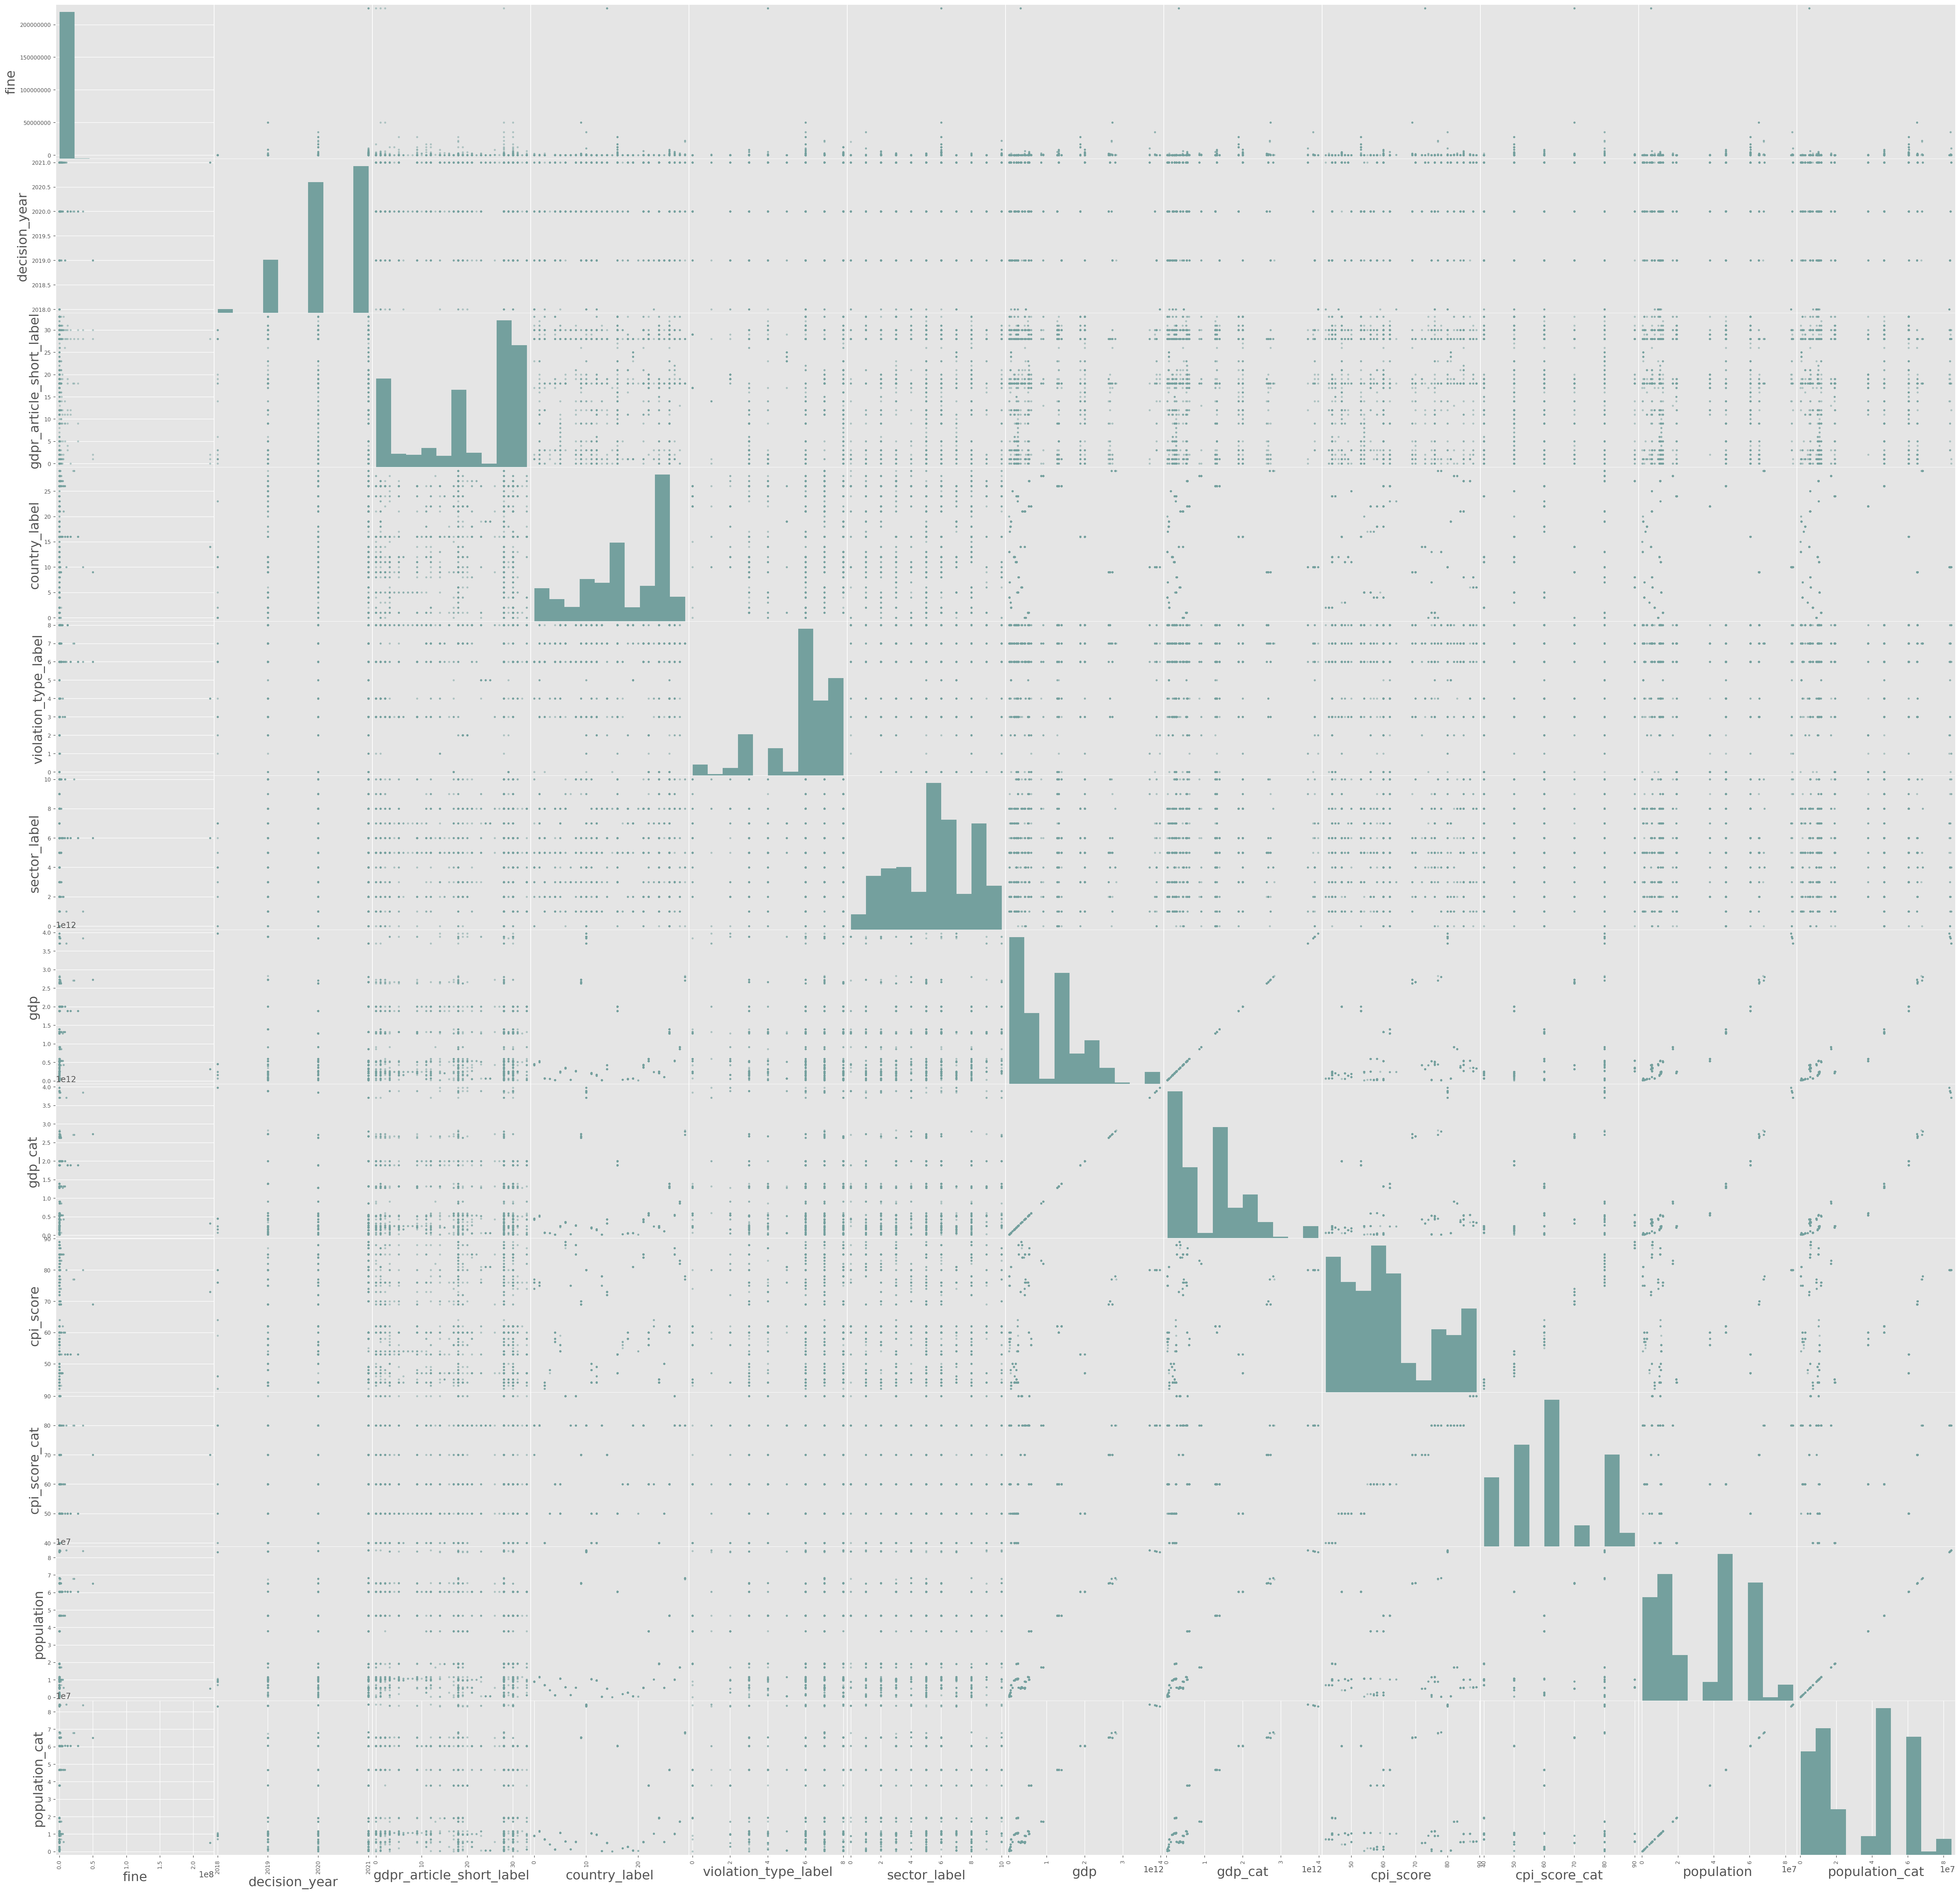

In [78]:
pd.plotting.scatter_matrix(df, figsize=(50, 50))
plt.show;

# Watermark

In [79]:
%watermark

Last updated: 2022-01-15T23:13:36.359617+00:00

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.144+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [80]:
%watermark --iversions

pandas    : 1.1.5
sqlite3   : 2.6.0
missingno : 0.5.0
seaborn   : 0.11.2
altair    : 4.2.0
google    : 2.0.3
matplotlib: 3.2.2
numpy     : 1.19.5
IPython   : 5.5.0



-----
